# Alpha Vantage API 
* Under Construction
* Activate the blocks of code
* Enter in your stock symbol
* Enter what time series you would like to see

In [11]:
#Alpha Vatange API APP

import requests
import numpy as np
import pandas as pd
import json as js
import matplotlib.pyplot as plt

In [12]:
def fetch_symbol(stock):
    return requests.get(api_root + api_series + stock + api, stream=False).json()

In [13]:
def company_symbol():
    try:
        stc = ''
        while not stc:
            stc = input("What stock would you like to view? ")
        stock = fetch_symbol(stc)
        if len(stc) == 0:
            print("Please enter a symbol.")
        #elif len(stc).isdigit() == True:
            #print ("It Works")
        #elif stock != '"Meta Data"':
            #print('elif statment')
            # Takes to long. Waits for JSON file and doesn't ask
            # to enter in another stock fetch_symbol
            # qyuicker way to tell not a stock symbol?
    except requests.exceptions.ConnectionError:
        print("Couldn't connect to server! Please check the network?")
    return stock

In [14]:
def series():
    """This function promts the user for the desired
    time series. Day, week, month, etc"""
    while True:
        t_type = input('Please enter time series you would like to see. ' \
                  'Daily[1], Weekly[2], Monthly[3]: ')
        if t_type == '1':
            t_type = 'Time Series (Daily)'
            return t_type
        elif t_type == '2':
            t_type = 'Weekly Time Series'
            return t_type
        elif t_type == '3':
            t_type = 'Monthly Time Series'
            return t_type
        else:
            print('Error')
            print(t_type)
            continue
    return t_type

In [15]:
def time_series(t_series):
    """The time_series function takes the selected time series and return
    the correct format for the url to retrive the symbol time series"""
    if t_series == 'Time Series (Daily)':
        api_series = '/query?function=TIME_SERIES_DAILY&symbol='
        return api_series
    elif t_series == 'Weekly Time Series':
        api_series = '/query?function=TIME_SERIES_WEEKLY&symbol='
        return api_series
    elif t_series == 'Monthly Time Series':
        api_series = '/query?function=TIME_SERIES_MONTHLY&symbol='
        return api_series
    else:
        print('Error') #DeBug
        print(t_series) #DeBug

In [16]:
def date_price_df(fhand, t_series):
    """The date_price_df function takes the file handle and creates a simple
    data frame made up of the date and price"""
    lst = []
    for key, values in fhand.items():
        if key == t_series:
            for date, sinfo in values.items():
                #Finds the date and values for stock
                for cols, nums in sinfo.items():
                    #finds the closing price
                    if cols == '4. close':
                        #create list for date and price key values
                        lst.append([date,nums])
    return lst

In [17]:
t_series = series()
api_root = 'https://www.alphavantage.co'
api_series = time_series(t_series)
api = '&apikey=EKFVA2O5LEO3WL88'
fhand = company_symbol()

Please enter time series you would like to see. Daily[1], Weekly[2], Monthly[3]: 1
What stock would you like to view? fnma


## This Block loops through the file handle to extract the date and price of the stock for that date

In [30]:
def createDframe(fhand):
    """This function finds the date and price for the selected stock
    and creates and returns the dataframe"""
    lst = []
    for key, values in fhand.items():
        if key == t_series:
            for date, sinfo in values.items():
                #Finds the date and values for stock
                for cols, nums in sinfo.items():
                    #finds the closing price
                    if cols == '4. close':
                        #create list for date and price key values
                        lst.append([date,nums])     
    df = pd.DataFrame(lst,columns=['Date','Price'])
    df = df.set_index('Date')
    return df

createDframe(fhand)

,Price
Date,
2019-05-01,2.4600
2019-04-30,2.4800
2019-04-29,2.4600
2019-04-26,2.4400
2019-04-25,2.3800
2019-04-24,2.4400
2019-04-23,2.5300
2019-04-22,2.5800
2019-04-18,2.7000


In [19]:
def createDframe2(fhand):
    """This function finds the date and volume for the selected stock
    and creates and returns the dataframe"""
    lst = []
    for key, values in fhand.items():
        if key == t_series:
            for date, sinfo in values.items():
                #Finds the date and values for stock
                for cols, vol in sinfo.items():
                    #finds the volume
                    if cols == '5. volume':
                        #create list for date and volume key values
                        lst.append([date,vol])
            

    df = pd.DataFrame(lst,columns=['Date','Volume'])
    return df

createDframe2(fhand)

,Date,Volume
0,2019-05-01,1154416
1,2019-04-30,1271663
2,2019-04-29,1513991
3,2019-04-26,2162325
4,2019-04-25,2940132
5,2019-04-24,4020989
6,2019-04-23,6603218
7,2019-04-22,5987840
8,2019-04-18,4842894
9,2019-04-17,20098531


Text(0.5,1,'Test Chart')

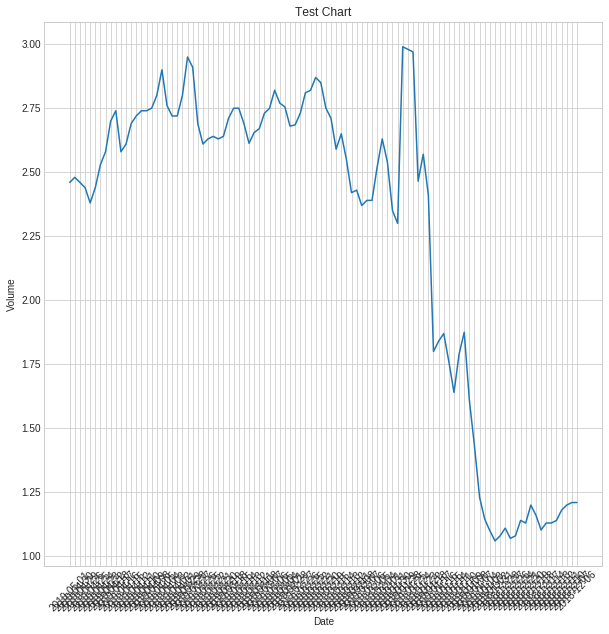

In [45]:
"""Test Chart
Still need to reverse the x axis
Plus change xticker"""
%matplotlib inline
df = createDframe(fhand)
df = df['Price'].astype(float)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
#fig.autofmt_xdate()
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Test Chart')

In [46]:
df.describe()

count    100.000000
mean       2.269462
std        0.641471
min        1.060000
25%        1.797500
50%        2.580000
75%        2.730000
max        2.990000
Name: Price, dtype: float64

In [49]:
df.info

AttributeError: 'Series' object has no attribute 'info'